# Importing Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Loading and visualising data

In [4]:
# Download
# Load
# Visualise
# Normalise

In [88]:
AX= pd.read_csv("Linear_X_Train.csv")
AY= pd.read_csv("Linear_Y_Train.csv")

# Convert into numpy array
X=AX.values
Y=AY.values

In [59]:
#Normalise

u= X.mean()
std= X.std()
print(u,std)

X=(X-u)/std

3.789561257387201e-18 1.0


Seperating Training and Testing Data

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y)

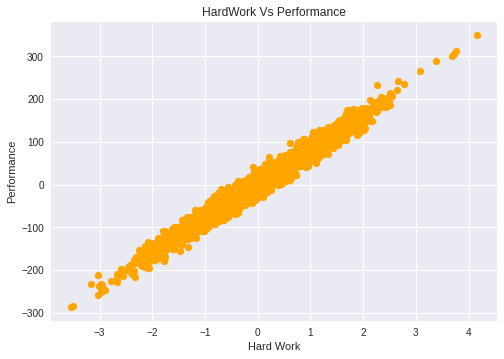

In [61]:
plt.style.use('seaborn')
plt.scatter(x_train,y_train,color='orange')
plt.title("HardWork Vs Performance")
plt.xlabel("Hard Work")
plt.ylabel("Performance")
plt.show()

## Linear Regression

In [51]:
def hypothesis(x,theta):
  y_=theta[0]+x*theta[1]
  return y_

def gradient(X,Y, theta):
  m= X.shape[0]
  grad=np.zeros((2,))

  for i in range(m):
    x=X[i]
    y_=hypothesis(x,theta)
    y=Y[i]
    grad[0]+=(y_-y)
    grad[1]+=(y_-y)*x

  return grad/m

def error(X,Y,theta):
  m= X.shape[0]
  total_error=0.0
  for i in range(m):
    y_=hypothesis(X[i],theta)
    total_error+=(y_-Y[i])**2
  return total_error/m

      
def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):
  theta=np.zeros((2,))
  error_list=[]
  for i in range(max_steps):
    grad=gradient(X,Y,theta)
    e=error(X,Y,theta)
    error_list.append(e)
    theta[0]=theta[0]-learning_rate*grad[0]
    theta[1]=theta[1]-learning_rate*grad[1] 
  return theta,error_list



In [62]:
theta,error_list=gradientDescent(x_train,y_train)

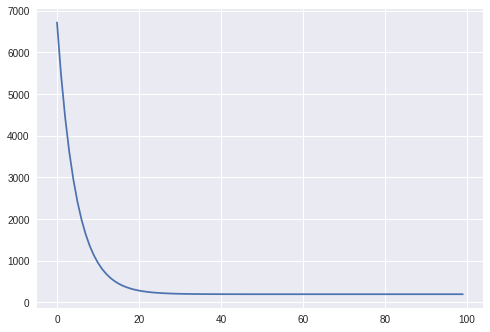

In [63]:
#Reduction in error with time
plt.plot(error_list) 

# Predictions and Figures

In [66]:
y_pred=hypothesis(x_train,theta)
print(y_pred)

[[ 82.1893506 ]
 [ 79.78319537]
 [-19.12695768]
 ...
 [ 64.34357737]
 [-26.93303801]
 [-73.54922068]]


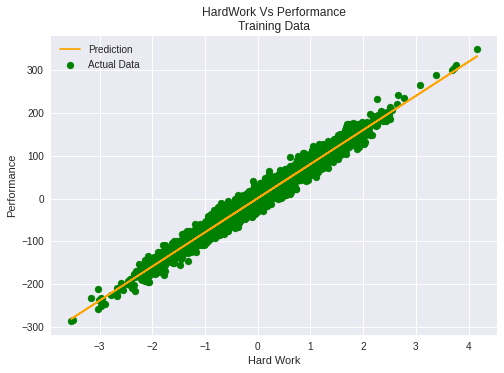

In [73]:
plt.scatter(x_train,y_train,color='green',label="Actual Data")
plt.plot(x_train,y_pred,color='orange',label="Prediction")
plt.title("HardWork Vs Performance\nTraining Data")
plt.xlabel("Hard Work")
plt.ylabel("Performance")
plt.legend()
plt.show()

Test dataset

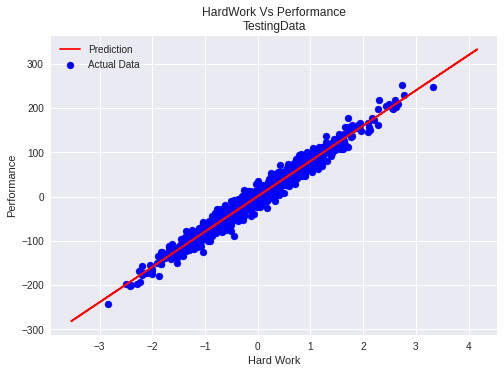

In [80]:
y_predTest=hypothesis(x_test,theta)
plt.scatter(x_test,y_test,color='blue',label="Actual Data")
plt.plot(x_train,y_pred,color='red',label="Prediction")
plt.title("HardWork Vs Performance\nTestingData")
plt.xlabel("Hard Work")
plt.ylabel("Performance")
plt.legend()
plt.show()

# User Test

In [84]:
theta[0]

0.699871906419263

Enter the hardwork magnitude : 2
Predicted Performance :  160.3172439231929


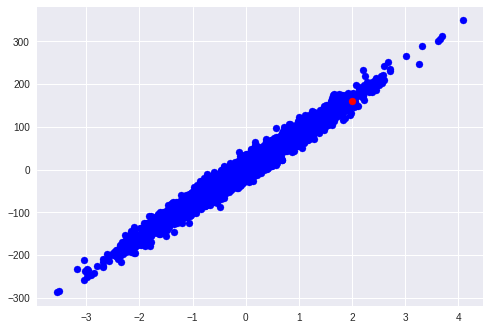

In [90]:
x_inp=float(input("Enter the hardwork magnitude : "))
y_pred_inp=theta[0]+x_inp*theta[1]
print("Predicted Performance : ",y_pred_inp)
plt.scatter(AX.values,AY.values,color='blue',label="Actual Data")
plt.scatter(x_inp,y_pred_inp,color='red')
plt.show()

## R2 Score Calculation

In [91]:
def r2_score(y_test,y_predTest ):
  num=np.sum((y_test-y_predTest)**2)
  denom=np.sum((y_test - y_test.mean())**2)
  score=(1-num/denom)
  return score*100


In [92]:
r2_score(y_test,y_predTest)

97.10411486686648